In [2]:
pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
oex = ['MMM','T','ABBV','ABT','ACN','ALL','GOOGL','GOOG','MO','AMZN','AXP','AIG','AMGN','AAPL','BAC',
       'BRK-B','BIIB','BLK','BA','BMY','CVS','COF','CAT','CVX','CSCO','C','KO','CL','CMCSA',
       'COP','DHR','DUK','DD','EMC','EMR','EXC','XOM','META','FDX','F','GD','GE','GM','GILD',
       'GS','HAL','HD','HON','INTC','IBM','JPM','JNJ','KMI','LLY','LMT','LOW','MA','MCD','MDT','MRK',
       'MET','MSFT','MS','NKE','NEE','OXY','ORCL','PYPL','PEP','PFE','PM','PG','QCOM',
       'SLB','SPG','SO','SBUX','TGT','TXN','BK','USB','UNP','UPS','UNH','VZ','V','WMT',
       'WBA','DIS','WFC']

In [5]:
num_stocks = len(oex)

In [6]:
data = yf.download(oex, start='2022-01-01', end='2024-07-31')

[*********************100%%**********************]  90 of 90 completed


In [8]:
data.head().T

Date                2022-01-03    2022-01-04    2022-01-05    2022-01-06  \
Price     Ticker                                                           
Adj Close AAPL    1.792736e+02  1.769984e+02  1.722902e+02  1.694141e+02   
          ABBV    1.218277e+02  1.215938e+02  1.222326e+02  1.216568e+02   
          ABT     1.320599e+02  1.289540e+02  1.283746e+02  1.283557e+02   
          ACN     3.907744e+02  3.879818e+02  3.811493e+02  3.627434e+02   
          AIG     5.419430e+01  5.571465e+01  5.494976e+01  5.589407e+01   
...                        ...           ...           ...           ...   
Volume    VZ      1.824010e+07  2.637680e+07  2.869730e+07  2.156380e+07   
          WBA     7.643300e+06  6.744300e+06  8.330900e+06  1.207670e+07   
          WFC     3.897810e+07  4.385510e+07  3.507260e+07  2.972080e+07   
          WMT     2.070660e+07  3.393000e+07  3.541800e+07  2.182890e+07   
          XOM     2.428240e+07  3.858400e+07  3.403330e+07  3.066850e+07   

Date                2022-01-07  
Price     Ticker                
Adj Close AAPL    1.695816e+02  
          ABBV    1.213419e+02  
          ABT     1.287546e+02  
          ACN     3.557860e+02  
          AIG     5.735777e+01  
...                        ...  
Volume    VZ      2.651250e+07  
          WBA     7.642000e+06  
          WFC     3.514930e+07  
          WMT     1.972350e+07  
          XOM     2.398540e+07  

[540 rows x 5 columns]

In [10]:
returns = data['Adj Close'].pct_change()
returns = returns - returns.mean(skipna=True)

In [11]:
def scale(x):
  return x / np.sum(np.abs(x))

<BarContainer object of 90 artists>

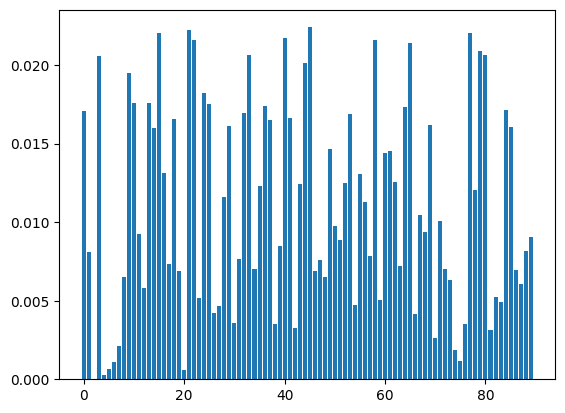

In [12]:
weights = scale(np.random.random(num_stocks))
plt.bar(np.arange(num_stocks), weights)

In [13]:
# value at risk
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=500):
  returns = returns.fillna(0.0)
  portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
  return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [14]:
# conditional value at risk
def cvar(value_invested, returns, weights, alpha=0.95, lookback_days=500):
  var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
  returns = returns.fillna(0.0)
  portfolio_returns = returns.iloc[-lookback_days].dot(weights)
  var_pct_loss = var / value_invested
  return np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss]) * value_invested

<ipython-input-14-e25a09864cd0>:7: RuntimeWarning: Mean of empty slice
  return np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss]) * value_invested


Text(0, 0.5, 'Observation Frequency')

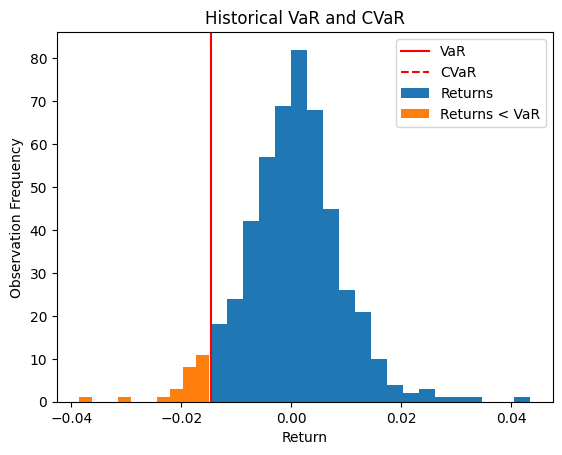

In [20]:
lookback_days = 500
value_invested=100000

portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights)
portfolio_VaR_return = portfolio_VaR / value_invested

portfolio_CVaR = cvar(value_invested, returns, weights)
portfolio_CVaR_return = portfolio_CVaR / value_invested

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.title('Historical VaR and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')